In [3]:
# Let's load the dataset and examine the missing values.

import pandas as pd
from scipy import stats
import numpy as np

# Load the dataset
file_path = ("C:/Users/india/Downloads/nba_draft_combine_all_years.csv")
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Display columns with missing values and their percentage
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Preview first few rows of the dataset to understand its structure
data_preview = data.head()

missing_summary, data_preview


(                          Missing Values  Percentage
 Bench                                233   45.067698
 Draft pick                           133   25.725338
 Agility                               73   14.119923
 Sprint                                71   13.733075
 Vertical (Max)                        67   12.959381
 Vertical (No Step Reach)              67   12.959381
 Vertical (No Step)                    67   12.959381
 Vertical (Max Reach)                  67   12.959381
 Hand (Width)                          49    9.477756
 Hand (Length)                         47    9.090909
 Body Fat                               3    0.580271
 Height (With Shoes)                    1    0.193424
 Weight                                 1    0.193424
 Standing reach                         0    0.000000
 Wingspan                               0    0.000000
 Unnamed: 0                             0    0.000000
 Height (No Shoes)                      0    0.000000
 Year                       

In [4]:
# Basic statistics for numerical columns
descriptive_stats = data[data.columns[3:]].describe()

descriptive_stats


,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
count,517.000000,384.000000,517.000000,516.000000,517.000000,517.000000,450.000000,450.000000,450.000000,450.000000,516.000000,514.000000,470.000000,468.000000,284.000000,444.000000,446.000000
mean,2013.187621,28.492188,77.609284,78.898740,82.497292,103.275629,35.136667,138.166667,29.584444,132.621111,214.833333,7.211673,8.725213,9.399573,10.239437,11.330248,3.299664
std,2.531507,15.888973,3.287633,3.275837,3.943068,4.897515,3.561688,4.272686,3.052361,4.644194,24.683537,2.480823,0.474687,0.732439,4.938390,0.563144,0.128422
min,2009.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,3.010000
25%,2011.000000,15.000000,75.250000,76.750000,79.750000,100.000000,32.500000,135.500000,27.500000,129.500000,196.000000,5.400000,8.500000,9.000000,6.750000,10.940000,3.200000
50%,2013.000000,28.000000,77.750000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,8.750000,9.500000,10.000000,11.255000,3.280000
75%,2015.000000,41.000000,80.000000,81.250000,85.500000,107.000000,37.500000,141.500000,31.500000,136.000000,232.000000,8.400000,9.000000,9.750000,14.000000,11.660000,3.380000
max,2017.000000,60.000000,85.250000,86.500000,92.500000,115.000000,44.500000,147.500000,38.000000,144.000000,303.000000,20.800000,10.250000,12.000000,23.000000,13.440000,3.810000


In [5]:
# Z-scores to detect potential outliers
# Removing rows where 'Draft pick' is missing for correlation analysis
cleaned_data = data.dropna(subset=['Draft pick'])
z_scores = stats.zscore(cleaned_data.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on a threshold of |z-score| > 3
outliers = (abs(z_scores) > 3).sum(axis=0)

outliers


index                       0
Unnamed: 0                  0
Year                        0
Draft pick                  0
Height (No Shoes)           0
Height (With Shoes)         0
Wingspan                    2
Standing reach              2
Vertical (Max)              0
Vertical (Max Reach)        0
Vertical (No Step)          0
Vertical (No Step Reach)    0
Weight                      0
Body Fat                    0
Hand (Length)               0
Hand (Width)                0
Bench                       0
Agility                     0
Sprint                      0
dtype: int64

In [7]:
# Correlation between 'Draft pick' (player success) and other combine measurements

# Selecting numerical columns and calculating correlations with 'Draft pick'
correlation_with_draft_pick = cleaned_data.corr(numeric_only=True)['Draft pick'].sort_values()

# Display the correlations with draft pick (player success metric)
correlation_with_draft_pick


Vertical (Max Reach)       -0.212925
Vertical (No Step Reach)   -0.197734
Wingspan                   -0.158043
Standing reach             -0.155869
Hand (Length)              -0.152097
Height (No Shoes)          -0.143299
Height (With Shoes)        -0.143257
Weight                     -0.123967
Hand (Width)               -0.122683
Vertical (No Step)         -0.043419
Vertical (Max)             -0.038550
Bench                       0.003260
Body Fat                    0.044035
Agility                     0.110642
Year                        0.119247
index                       0.163786
Unnamed: 0                  0.163786
Sprint                      0.170126
Draft pick                  1.000000
Name: Draft pick, dtype: float64

In [8]:
# Selecting relevant features (combine measurements)
features = cleaned_data[['Height (No Shoes)', 'Weight', 'Wingspan', 'Vertical (Max)', 'Agility', 'Sprint']]

# Fill missing values with column means (simple imputation)
features = features.fillna(features.mean())

# Target variable (Draft pick as player success)
target = cleaned_data['Draft pick']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error and R-squared
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(13.229771112704913, 0.09258144774768151)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display coefficients of the model
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 232.0077469607581
R^2 Score: 0.09258144774768151
                   Coefficient
Height (No Shoes)    -0.241712
Weight               -0.025091
Wingspan             -0.728577
Vertical (Max)        0.100954
Agility               3.456537
Sprint               36.528139


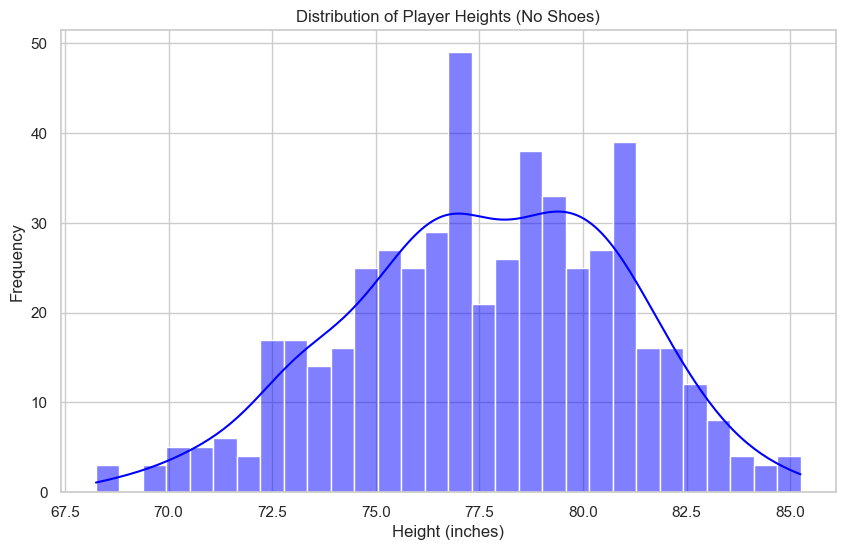

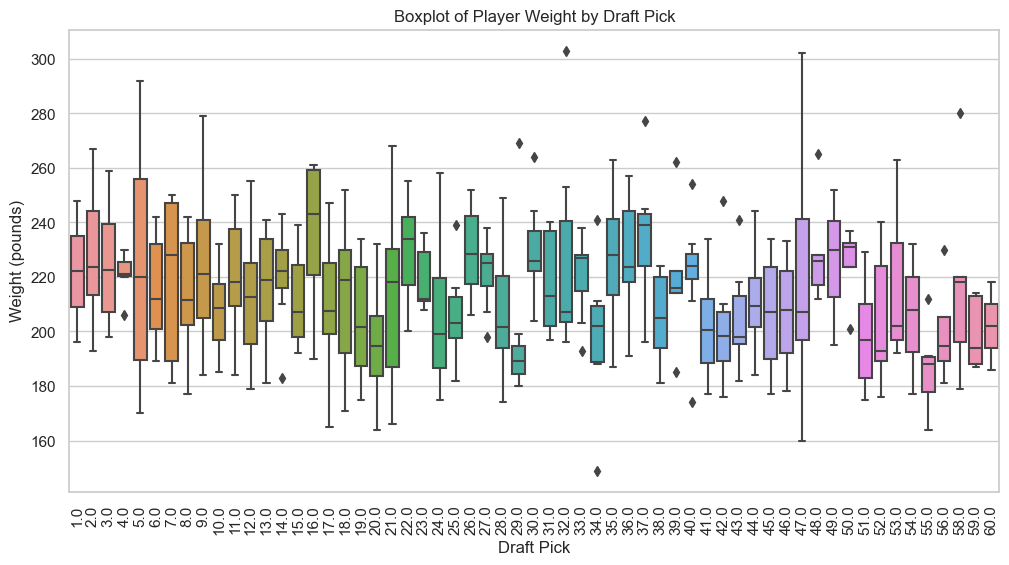

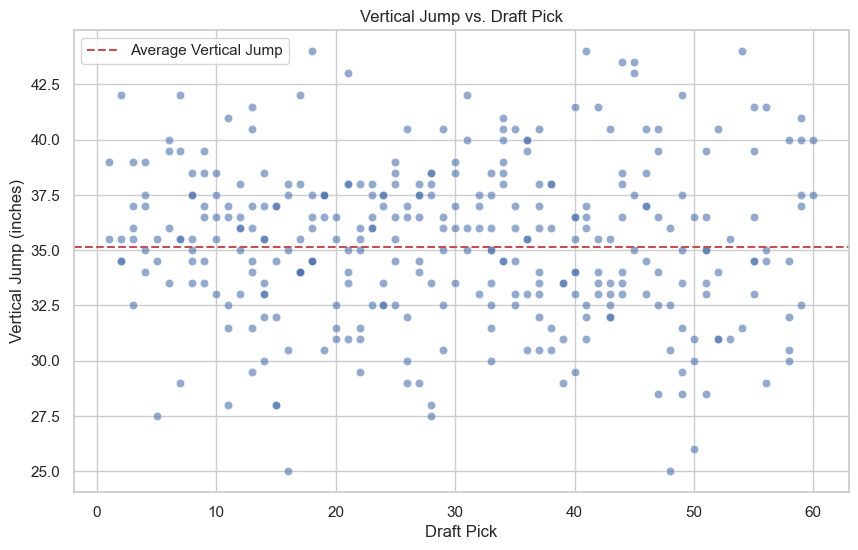

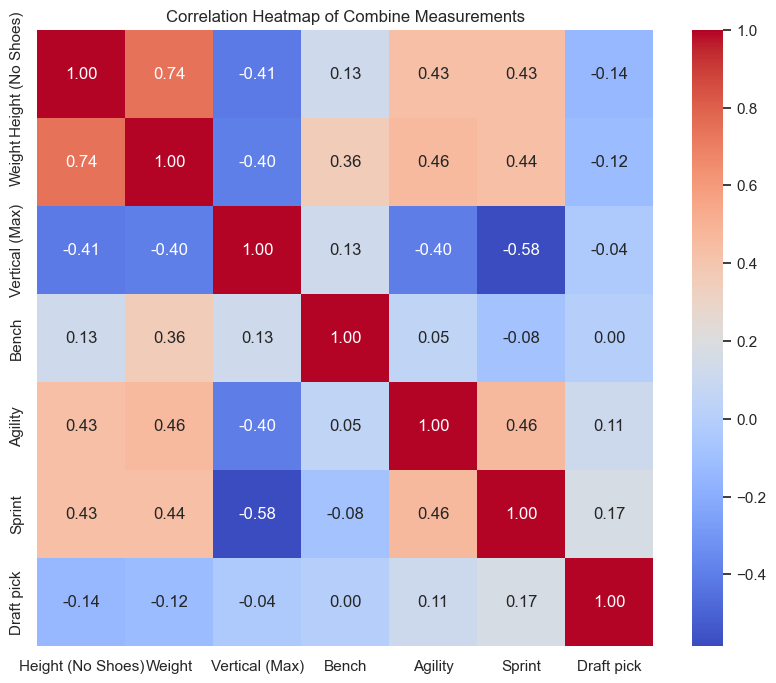

C:\Users\india\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


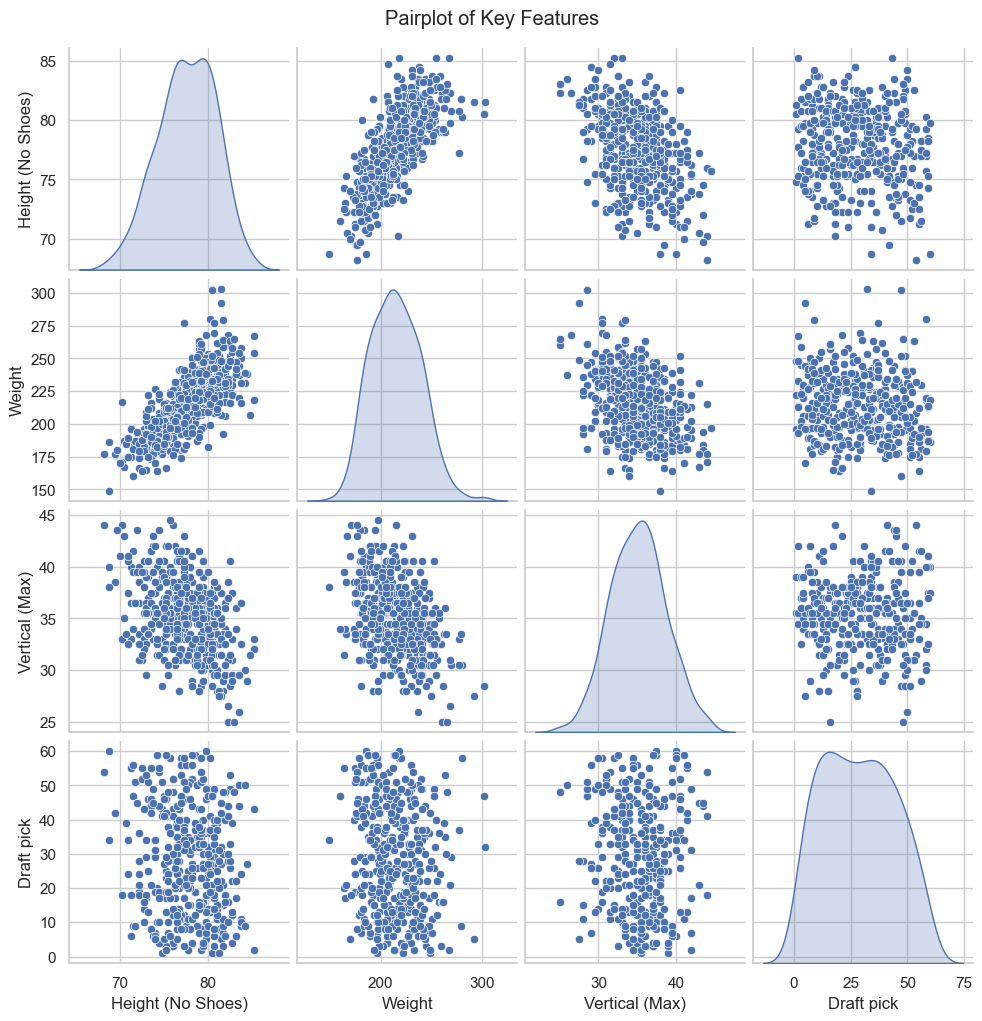

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# **1. Distribution of Player Heights**
plt.figure(figsize=(10, 6))
sns.histplot(data['Height (No Shoes)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Player Heights (No Shoes)')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# **2. Boxplot of Weight by Draft Pick**
plt.figure(figsize=(12, 6))
sns.boxplot(x='Draft pick', y='Weight', data=data)
plt.title('Boxplot of Player Weight by Draft Pick')
plt.xlabel('Draft Pick')
plt.ylabel('Weight (pounds)')
plt.xticks(rotation=90)
plt.show()

# **3. Scatter Plot of Vertical Jump vs. Draft Pick**
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Draft pick', y='Vertical (Max)', data=data, alpha=0.6)
plt.title('Vertical Jump vs. Draft Pick')
plt.xlabel('Draft Pick')
plt.ylabel('Vertical Jump (inches)')
plt.axhline(y=data['Vertical (Max)'].mean(), color='r', linestyle='--', label='Average Vertical Jump')
plt.legend()
plt.show()

# **4. Correlation Heatmap**
correlation_matrix = data[['Height (No Shoes)', 'Weight', 'Vertical (Max)', 'Bench', 'Agility', 'Sprint', 'Draft pick']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Combine Measurements')
plt.show()

# **5. Pairplot of Key Features**
sns.pairplot(data[['Height (No Shoes)', 'Weight', 'Vertical (Max)', 'Draft pick']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()